Que. 3

Perform K-Means,Hierarchical and DBSCAN Clustering for the Universities.csv data and identify the number of clusters formed and Visualise the results.


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Universities.csv")

In [4]:
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [5]:
df.drop('Univ',axis = 1,inplace = True)

In [6]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k)
clusters_info = kmeans.fit(df)

In [7]:
clusters_info.labels_

array([2, 3, 2, 4, 2, 4, 4, 2, 1, 3, 4, 2, 0, 0, 4, 0, 4, 0, 0, 1, 0, 2,
       0, 0, 1], dtype=int32)

In [8]:
clusters_info.cluster_centers_

array([[1.14325000e+03, 5.91250000e+01, 5.92500000e+01, 1.71250000e+01,
        1.23616250e+04, 7.95000000e+01],
       [1.35500000e+03, 8.70000000e+01, 2.76666667e+01, 1.16666667e+01,
        4.04730000e+04, 9.33333333e+01],
       [1.27500000e+03, 7.88333333e+01, 3.55000000e+01, 1.15000000e+01,
        2.42208333e+04, 8.78333333e+01],
       [1.36000000e+03, 8.75000000e+01, 3.45000000e+01, 6.50000000e+00,
        6.11330000e+04, 8.40000000e+01],
       [1.34666667e+03, 8.83333333e+01, 2.35000000e+01, 1.06666667e+01,
        3.27995000e+04, 9.28333333e+01]])

In [9]:
len(clusters_info.cluster_centers_)

5

In [10]:
clusters_info.n_iter_

4

Text(0.5, 1.0, 'Clusters')

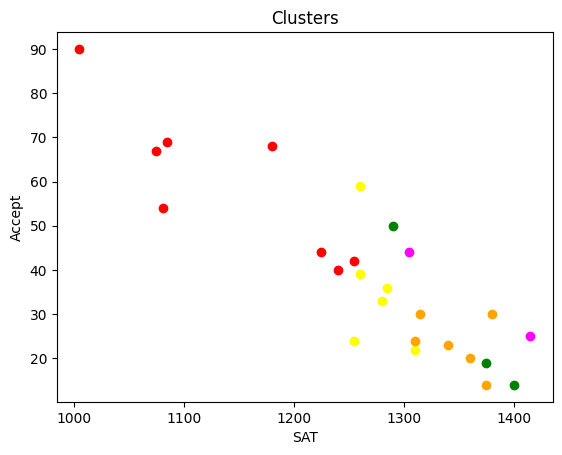

In [11]:
plt.scatter(df['SAT'][clusters_info.labels_ == 0], df['Accept'][clusters_info.labels_ == 0], color="red")
plt.scatter(df['SAT'][clusters_info.labels_ == 1], df['Accept'][clusters_info.labels_ == 1], color="green")
plt.scatter(df['SAT'][clusters_info.labels_ == 2], df['Accept'][clusters_info.labels_ == 2], color="yellow")
plt.scatter(df['SAT'][clusters_info.labels_ == 3], df['Accept'][clusters_info.labels_ == 3], color="magenta")
plt.scatter(df['SAT'][clusters_info.labels_ == 4], df['Accept'][clusters_info.labels_ == 4], color="orange")
plt.xlabel("SAT")
plt.ylabel("Accept")
plt.title("Clusters")

In [12]:
from sklearn.cluster import KMeans

# create a list to get the within sum of squares for difrerent no of clusters
wss = []

# create a loop to find the wss for different no of clusters
for k in range(1, 10):

    # create KMeans object
    kmeans = KMeans(n_clusters=k)

    # fit the data
    clusters_info = kmeans.fit(df)

    # collect the wss for k
    wss.append(clusters_info.inertia_)

In [13]:
wss

[4994156678.48,
 1978159375.579365,
 582713442.3560606,
 286514201.925,
 209256074.12777779,
 111518713.04166666,
 69933350.93333334,
 44233695.25,
 44246799.599999994]

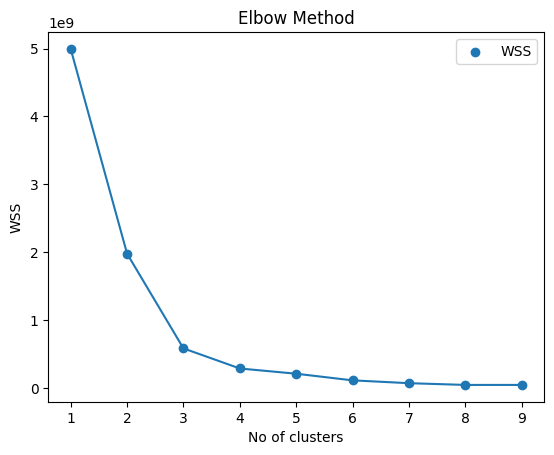

In [14]:
plt.scatter(range(1, 10), wss, label="WSS")
plt.plot(range(1, 10), wss)
plt.xlabel("No of clusters")
plt.ylabel("WSS")
plt.title("Elbow Method")
plt.legend()